# Grism Saturation Limits, Continuum Sensitivity, and Line Sensitivity

***
### Table of Contents

1. [Information](#Information)
2. [Imports](#Imports)
3. [Data](#Data)
4. [Generate the Saturation Limits Plot](#Generate-the-Saturation-Limits-Plot)
5. [Generate the Grism Continuum Sensitivity Plot](#Generate-the-Grism-Continuum-Sensitivity-Plot)
6. [Generate the Grism Line Sensitivity Plot](#Generate-the-Grism-Line-Sensitivity-Plot)
7. [Issues](#Issues)
***

## Information

#### JDox links: 
* [NIRCam Grism Time Series](https://jwst-docs.stsci.edu/display/JTI/NIRCam+Grism+Time+Series#NIRCamGrismTimeSeries-Saturationlimits)
    * Figure 5: Grism saturation limits in the 2048 × 64 pixel subarray
* [NIRCam+Sensitivity](https://jwst-docs.stsci.edu/display/JTI/NIRCam+Sensitivity#NIRCamSensitivity-Grism)
    * Figure 2: Expected NIRCam grism line and continuum sensitivities in modules A and B

#### Figure Author: Alicia Canipe, Dan Coe
#### Data Location: in notebook

## Imports

In [1]:
from astropy.io import ascii
from astropy.table import Table
import matplotlib.pyplot as plt

## Data

<div class="alert alert-block alert-warning">
<b>Note:</b> We need to decide on a way of versioning the data used for JDox plots. Right now I will hardcode this path until we figure out what to do. 
</div>



In [5]:
module_a_lw = Table.read('/ifs/jwst/wit/witserv/data7/nrc/JDoxPlots/moda_lw_grism.txt',format='ascii')
module_b_lw = Table.read('/ifs/jwst/wit/witserv/data7/nrc/JDoxPlots/modb_lw_grism.txt',format='ascii')

In [20]:
module_b_lw

wavelength (micrometer),Fcont,Fline,Ksat (AOV),Ksat (M2V),filter
float64,float64,float64,float64,float64,str6
2.5,11.0,1.2e-17,3.8,3.8,F322W2
2.7,8.6,7.9e-18,4.0,3.9,F322W2
2.9,7.7,6.2e-18,3.9,3.9,F322W2
3.1,8.2,5.9e-18,3.7,3.7,F322W2
3.3,6.5,4.3e-18,3.8,3.9,F322W2
3.5,6.2,3.8e-18,3.6,3.9,F322W2
3.7,6.0,3.4e-18,3.6,3.8,F322W2
3.9,6.3,3.3e-18,3.4,3.6,F322W2
4.1,9.5,4.8e-18,3.1,3.4,F444W


## Generate the Saturation Limits Plot

In [13]:
f322w2 = module_a_lw['filter'] == 'F322W2'
f444w = module_b_lw['filter'] == 'F444W'

/Users/acanipe/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0.04, 0.5, 'K magnitude (Vega) A0V star')

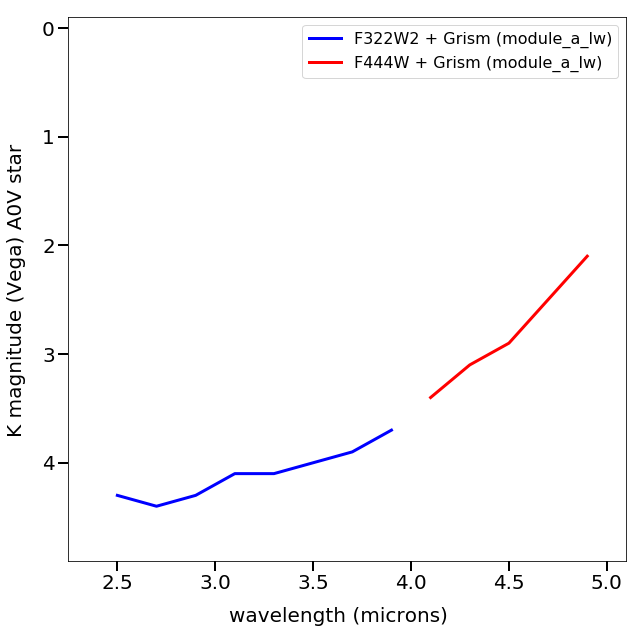

In [16]:
f, ax1 = plt.subplots(1, sharex=True,figsize=(10, 10))

ax1.plot(module_a_lw[f322w2]['wavelength (micrometer)'], module_a_lw[f322w2]['Ksat (AOV)'], lw=3, label='F322W2 + Grism (Mod A)',color='blue')
ax1.plot(module_a_lw[f444w]['wavelength (micrometer)'], module_a_lw[f444w]['Ksat (AOV)'], lw=3, label='F444W + Grism (Mod A)',color='red')
# ax1.plot(module_b_lw[f322w2]['wavelength (micrometer)'], module_b_lw[f322w2]['Ksat (AOV)'], lw=3, label='F322W2 + Grism (module_b_lw)',color='blue',linestyle='dashed')
# ax1.plot(module_b_lw[f444w]['wavelength (micrometer)'], module_b_lw[f444w]['Ksat (AOV)'], lw=3, label='F444W + Grism (module_b_lw)',color='red',linestyle='dashed')

ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_xlim(2.25,5.1)
ax1.set_ylim(4.9,-0.1)
ax1.tick_params(labelsize=20)
ax1.tick_params(axis='both', right='off', top='off')
ax1.tick_params('y', length=10, width=2, which='major')
ax1.tick_params('x', length=10, width=2, which='major')

ax1.legend(loc='best', fontsize=16)

f.text(0.5, 0.04, 'wavelength (microns)', ha='center', fontsize=20)
f.text(0.04, 0.5, 'K magnitude (Vega) A0V star', va='center', rotation='vertical', fontsize=20)

## Generate the Grism Continuum Sensitivity Plot

/Users/acanipe/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0.03, 0.5, '10$\\sigma$ Sensitivity in $10^{4}$ s ($\\mu$Jy)')

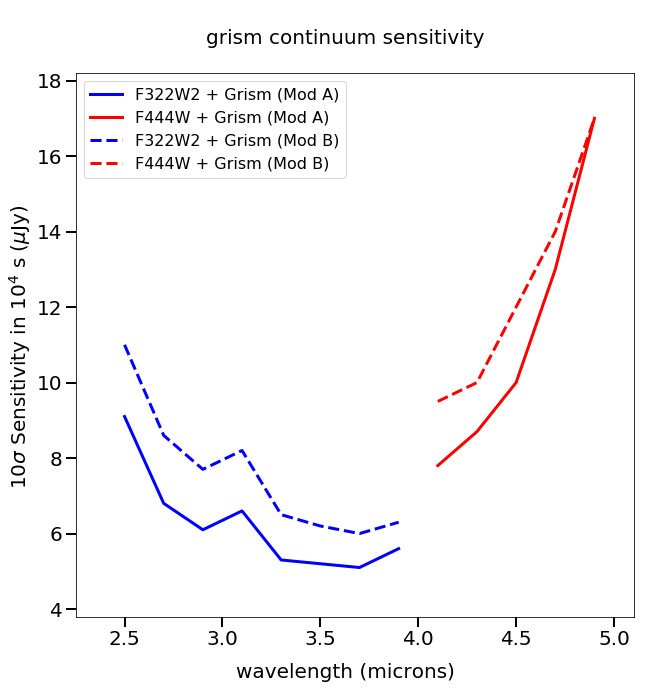

In [22]:
f, ax1 = plt.subplots(1, sharex=True,figsize=(10, 10))

ax1.plot(module_a_lw[f322w2]['wavelength (micrometer)'], module_a_lw[f322w2]['Fcont'], lw=3, label='F322W2 + Grism (Mod A)',color='blue')
ax1.plot(module_a_lw[f444w]['wavelength (micrometer)'], module_a_lw[f444w]['Fcont'], lw=3, label='F444W + Grism (Mod A)',color='red')
ax1.plot(module_b_lw[f322w2]['wavelength (micrometer)'], module_b_lw[f322w2]['Fcont'], lw=3, label='F322W2 + Grism (Mod B)',color='blue',linestyle='dashed')
ax1.plot(module_b_lw[f444w]['wavelength (micrometer)'], module_b_lw[f444w]['Fcont'], lw=3, label='F444W + Grism (Mod B)',color='red',linestyle='dashed')

# ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_xlim(2.25,5.1)
ax1.set_ylim(3.8,18.2)
ax1.tick_params(labelsize=20)
ax1.tick_params(axis='both', right='off', top='off')
ax1.tick_params('y', length=10, width=2, which='major')
ax1.tick_params('x', length=10, width=2, which='major')

ax1.legend(loc='best', fontsize=16)

f.text(0.5, 0.92, '\ngrism continuum sensitivity', ha='center', fontsize=20)
f.text(0.5, 0.04, 'wavelength (microns)', ha='center', fontsize=20)
f.text(0.03, 0.5, '10$\sigma$ Sensitivity in $10^{4}$ s ($\mu$Jy)', va='center', rotation='vertical', fontsize=20)

## Generate the Grism Line Sensitivity Plot

/Users/acanipe/miniconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


Text(0.03, 0.5, '10$\\sigma$ Sensitivity in $10^{4}$ s ($10^{-18}$ erg s$^{-1}$ cm$^{-2}$)')

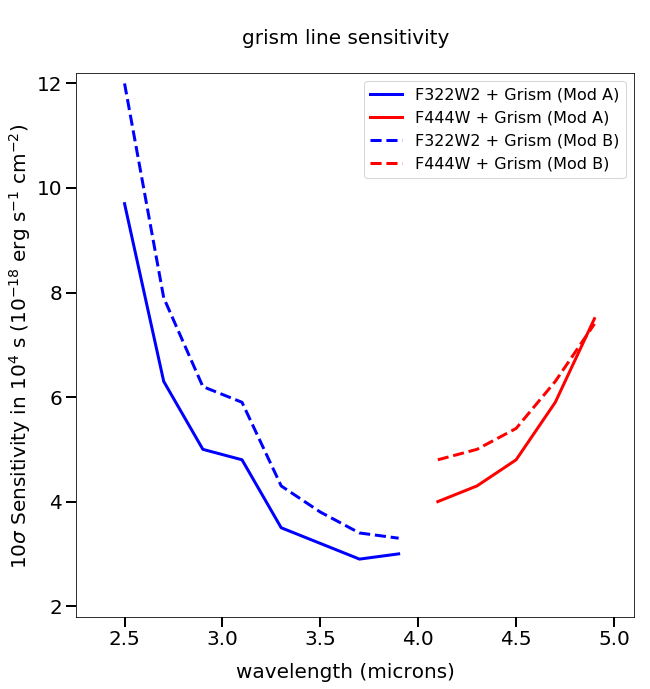

In [23]:
f, ax1 = plt.subplots(1, sharex=True,figsize=(10, 10))

ax1.plot(module_a_lw[f322w2]['wavelength (micrometer)'], module_a_lw[f322w2]['Fline']/10**-18, lw=3, label='F322W2 + Grism (Mod A)',color='blue')
ax1.plot(module_a_lw[f444w]['wavelength (micrometer)'], module_a_lw[f444w]['Fline']/10**-18, lw=3, label='F444W + Grism (Mod A)',color='red')
ax1.plot(module_b_lw[f322w2]['wavelength (micrometer)'], module_b_lw[f322w2]['Fline']/10**-18, lw=3, label='F322W2 + Grism (Mod B)',color='blue',linestyle='dashed')
ax1.plot(module_b_lw[f444w]['wavelength (micrometer)'], module_b_lw[f444w]['Fline']/10**-18, lw=3, label='F444W + Grism (Mod B)',color='red',linestyle='dashed')

# ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_xlim(2.25,5.1)
ax1.set_ylim(1.8,12.2)
ax1.tick_params(labelsize=20)
ax1.tick_params(axis='both', right='off', top='off')
ax1.tick_params('y', length=10, width=2, which='major')
ax1.tick_params('x', length=10, width=2, which='major')

ax1.legend(loc='best', fontsize=16)

f.text(0.5, 0.92, '\ngrism line sensitivity', ha='center', fontsize=20)
f.text(0.5, 0.04, 'wavelength (microns)', ha='center', fontsize=20)
f.text(0.03, 0.5, '10$\sigma$ Sensitivity in $10^{4}$ s ($10^{-18}$ erg s$^{-1}$ cm$^{-2}$)', va='center', rotation='vertical', fontsize=20)

## Issues

* We are missing data for F410M that is shown on the JDox pages. Are the text files out of date?